In [103]:
import pandas as pd
import numpy as np

from pydataset import data
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

# Data Wrangling 

In [101]:
import acquire

In [102]:
df = acquire.get_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


# Data PREP

In [104]:
import prepare

In [105]:
df = prepare.prep_telco_data(df)
pd.set_option('display.max_columns', None)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [7]:
from prepare import split

In [106]:
train, validate, test = prepare.split(df, stratify_by= 'churn')

train.shape, validate.shape, test.shape


((3937, 51), (1688, 51), (1407, 51))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        7032 non-null   int64  
 1   internet_service_type_id               7032 non-null   int64  
 2   contract_type_id                       7032 non-null   int64  
 3   customer_id                            7032 non-null   object 
 4   gender                                 7032 non-null   object 
 5   senior_citizen                         7032 non-null   int64  
 6   partner                                7032 non-null   object 
 7   dependents                             7032 non-null   object 
 8   tenure                                 7032 non-null   int64  
 9   phone_service                          7032 non-null   object 
 10  multiple_lines                         7032 non-null   object 
 11  onli

In [10]:
 df = df.rename(columns= {'payment_type_Electronic check':'payment_type_Electronic_check'})

In [11]:
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic_check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


# set data contex 

In [99]:
df.isnull().sum()

payment_type_id                          0
internet_service_type_id                 0
contract_type_id                         0
customer_id                              0
gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_typ

In [ ]:
df.churn.value_counts().plot(kind= 'barh', color = ["xkcd:sky blue", "g"])
plt.title("churned Customers")

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

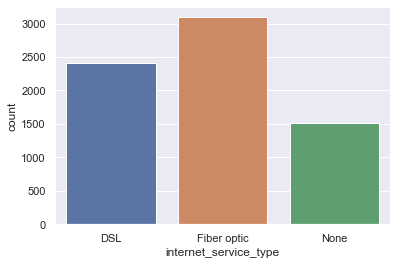

In [89]:
sns.countplot(x='internet_service_type', data=df)

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

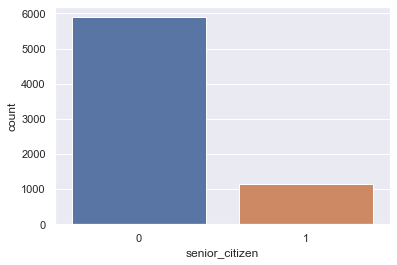

In [88]:
sns.countplot(x='senior_citizen', data=df)

<AxesSubplot:xlabel='payment_type', ylabel='count'>

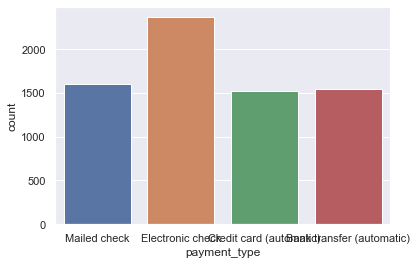

In [98]:
sns.countplot(x='payment_type', data=df)

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

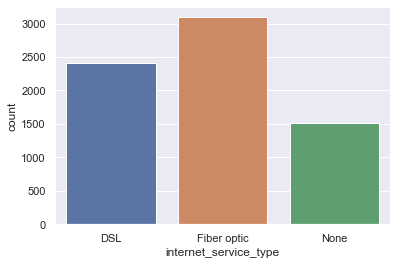

In [97]:
sns.countplot(x='internet_service_type', data=df)

# Telco exploration 

Univariate means a single variable, so we'll look at .value_counts() and histograms. - Explore the target variable itself. What is the distribution of values?

have o ask at least 4 questions 



In [15]:
train.churn.value_counts()
#this is only going to be exploring the train data set 

No     2891
Yes    1046
Name: churn, dtype: int64

# Exploritoy Analysis: What is causing churn ?

## Question 1 Are certain payment types indicators of churn  ?

Text(0.5, 1.0, 'Churn and Payment Type')

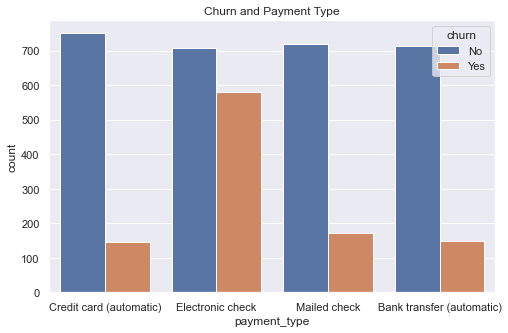

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(train['payment_type'],hue=train['churn'])
plt.title("Churn and Payment Type")

In [53]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "payment type and churn are independent"
alternative_hypothesis = "there is a relationship between using an elecronic check and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that payment type and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between using an elecronic check and churn


4.64358817076333e-73

Based on our statistical ttes and our graph it does look like there is a relationship with our customers making payments using electronic checks than any other payment service

is there a ceratin age group that uses electronic checks ?

<AxesSubplot:xlabel='payment_type', ylabel='count'>

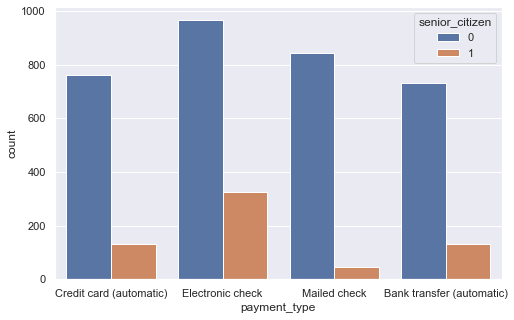

In [116]:

plt.figure(figsize=(8,5))
sns.countplot(train['payment_type'],hue=train['senior_citizen'])

##  Question 2 - Learning about our Seniors

Are our senior citizen more likely to churn than non seniors ? 

we can use this question to pin point the age demoghaphic to reduce the churn 

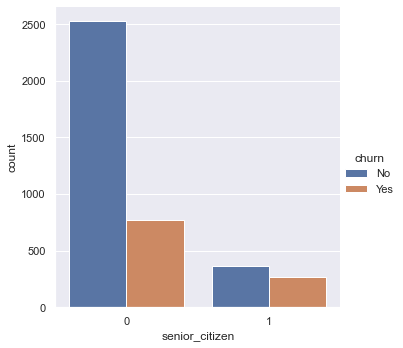

In [87]:
sns.catplot(x="senior_citizen",hue = 'churn', data=train, kind='count')



In [77]:
pd.crosstab(train.senior_citizen, train.churn)

churn,No,Yes
senior_citizen,,
0,2527,775
1,364,271


In [59]:
# # senior subset  subset setup
no_senior = train[train.senior_citizen == 0]

yes_senior = train[train.senior_citizen == 1]

In [166]:
# alpha = 0.05
null_hypothesis = "being a senior_citizen and churn are independent"
alternative_hypothesis = "there is a relationship between churning and being a senior_citizen"

# # Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.senior_citizen)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that being a senior_citizen and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between churning and being a senior_citizen


1.7561315684822571e-23

## Question 3 Do people who churn have higher monthly charges? 

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

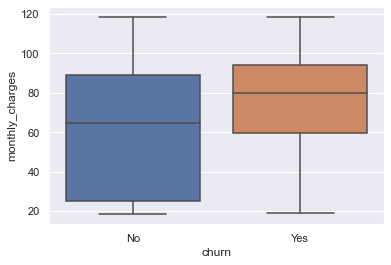

In [190]:

sns.boxplot(x="churn", y="monthly_charges", data=train)


In [ ]:
churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

In [158]:
null_hypothesis = "the monthly charges of customers who churn = the monthly charges of customer who do not churn"
alternative_hypothesis = "the monthly charges of customers who churn =! the monthly customer who do not churn"

alpha = 0.05
t, p = stats.ttest_ind(churn_sample,no_churn_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("Evidence suggests that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We find insufficient evidence to support the claim that", alternative_hypothesis)
p

We reject the null hypothesis that  are the monthly charges of customers who churn equal too the customer who do not churn?
Evidence suggests that are the monthly charges of customers who churn not equal too the customer who do not churn?


2.460130776937842e-43

# how are our senior citizens doing on monthly charges ?

here we are more so looking for the average monthly charges of seniors so we can get a idea of their churn rate based on monthly charges.

<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

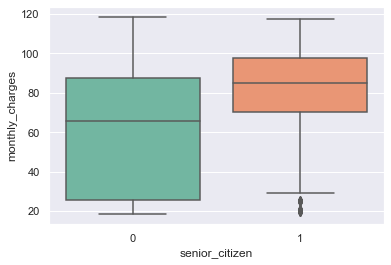

In [192]:
sns.boxplot(x='senior_citizen', y="monthly_charges", data=train, palette ='Set2')

In [159]:
senior_sample = train[train.senior_citizen == 1].monthly_charges
not_senior_sample = train[train.senior_citizen == 0].monthly_charges

In [194]:
null_hypothesis = "the monthly charges of seniors is equal too the monthly charges of non-seniors"
alternative_hypothesis = "the monthly charges of customers who are seniors is not equal too the customer who are not seniors"

alpha = 0.05
t, p = stats.ttest_ind(senior_sample,not_senior_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("Evidence suggests that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We find insufficient evidence to support the claim that", alternative_hypothesis)
p

We reject the null hypothesis that the monthly charges of customers who are seniors equal too the monthly charges of customer who are not seniors
Evidence suggests that the monthly charges of customers who are seniors not equal too the customer who are not seniors


1.6330942397804365e-59

<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

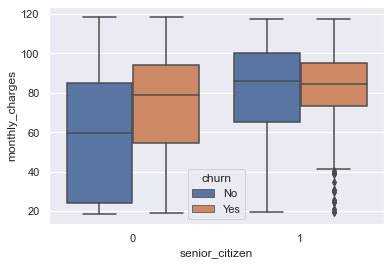

In [193]:
sns.boxplot(x='senior_citizen', y="monthly_charges",hue="churn", data=train,)

from the look of this chart it look like for our churn rate there is a high ammount of seniors that for our below 65 customers 

we can conclude from this graph and statistical test that our senior citizen customer( customers over 65+) are more likely to churn becasue of high monthly charges, almst as much as our chustomers below the age of 65, 
From my statistical test we can see that  i was unable to reject my null hypothesis therefore showing that there is a relationship between or senior customers and 

## Question 4 -is someone with tech support more likely to churn?

<AxesSubplot:xlabel='tech_support', ylabel='count'>

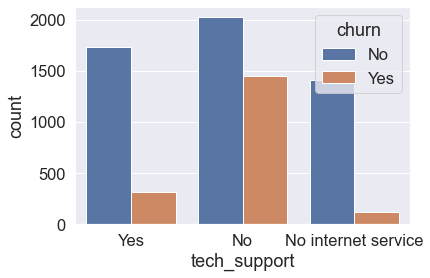

In [32]:
sns.countplot(x='tech_support', data=df, hue="churn")

In [34]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "tech support and churn are independent"
alternative_hypothesis = "there is a relationship between tech support and churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.tech_support, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p



Reject the null hypothesis that tech support and churn are independent
Sufficient evidence to move forward understanding that there is a relationship between tech support and churn


8.373959266633126e-101

From our graph and statisticly we can see that 

Sub question- are seniors mostly using tech support ?

<AxesSubplot:xlabel='tech_support', ylabel='count'>

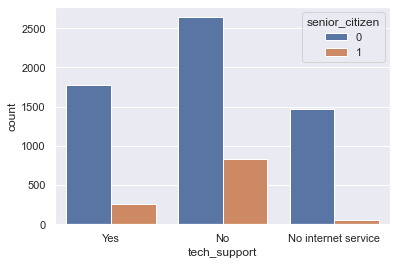

In [114]:
sns.countplot(x='tech_support', data=df, hue="senior_citizen")

# TELCO MODELING

In [167]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns



In [168]:
train, validate, test = prepare.split(df, stratify_by='churn')

train.shape, validate.shape, test.shape


((3937, 51), (1688, 51), (1407, 51))

In [ ]:
df

In [169]:


# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn','churn_encoded','customer_id', 'gender','partner', 'dependents', 
                              'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type', 'internet_service_type', 
                              'payment_type'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['churn','churn_encoded', 'customer_id', 'gender','partner', 'dependents', 'phone_service', 'multiple_lines', 
                                    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                                    'paperless_billing', 'contract_type', 'internet_service_type', 'payment_type'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['churn','churn_encoded', 'customer_id', 'gender','partner', 'dependents', 'phone_service',
                            'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support',
                            'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type', 
                            'internet_service_type', 'payment_type'])
y_test = test[['churn']]


In [170]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)


In [171]:
# model.fit(X, y)

tree1 = tree1.fit(X_train, y_train)


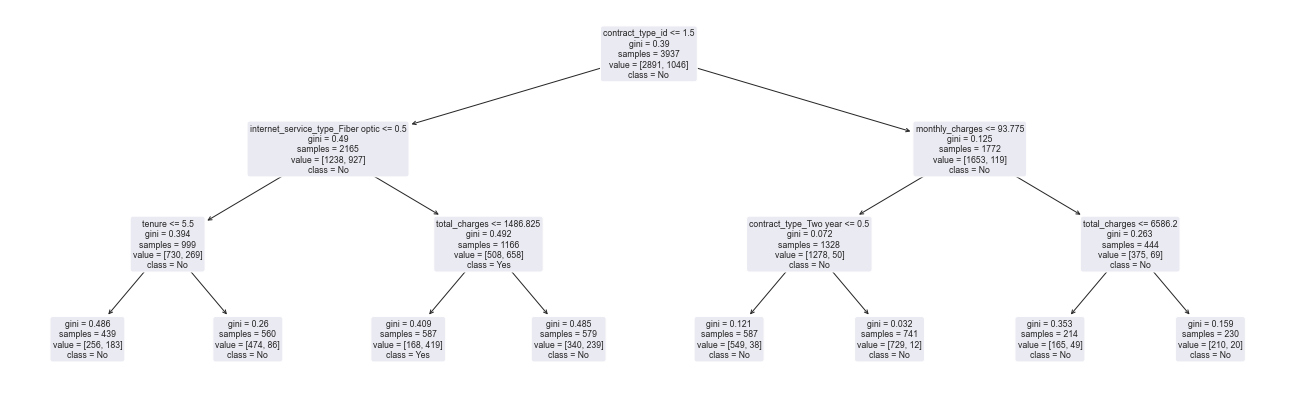

In [181]:
plt.figure(figsize=(23, 7))
plot_tree(tree1, feature_names=X_train.columns,class_names=tree1.classes_, rounded= True)
plt.show()

In [182]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.80


In [183]:
y_predictions = tree1.predict(X_train)

In [184]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

          No       0.81      0.94      0.87      2891
         Yes       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



In [185]:
tree2 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [186]:
tree2 = tree2.fit(X_validate, y_validate)


In [187]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.76


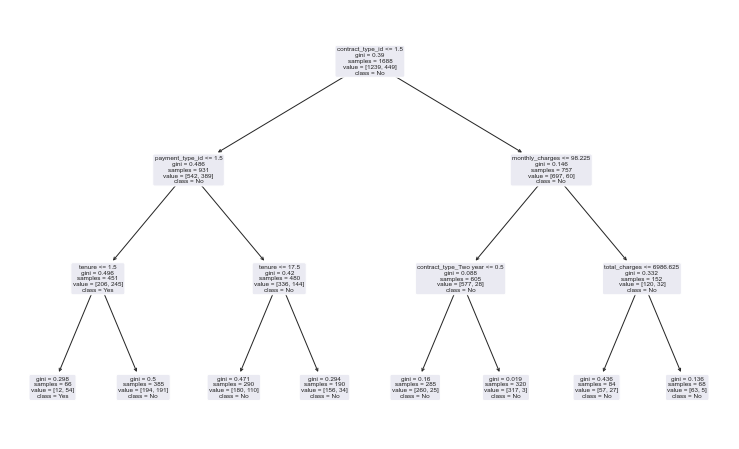

In [188]:
plt.figure(figsize=(13, 8))
plot_tree(tree2, feature_names=X_validate.columns,class_names=tree2.classes_, rounded= True)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=5, 
                            random_state=123)

In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
print(rf.feature_importances_)

In [ ]:
y_pred = rf.predict(X_train)
y_pred

In [ ]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [ ]:
knn.fit(X_train, y_train)


In [ ]:
y_pred = knn.predict(X_train)


In [ ]:
y_pred_proba = knn.predict_proba(X_train)


In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


In [ ]:
knn15 = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [ ]:
knn15.fit(X_train, y_train)


In [ ]:
print('Accuracy of KNN KNN=15 classifier on training set: {:.2f}'
     .format(knn15.score(X_train, y_train)))


In [ ]:
print(confusion_matrix(y_train, y_pred))


In [ ]:
print(classification_report(y_train, y_pred))


In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


In [ ]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()